# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from azureml.core import Workspace, Dataset

In [21]:
df = pd.read_csv("dataset/weather_dataset_raw.csv")
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain


In [22]:
df.describe()

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,48226.000000,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,27843.727094,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24113.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,48226.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,72339.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,96452.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [25]:
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

In [26]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [27]:
df.shape

(96453, 11)

In [28]:
df.isnull().values.any()

True

In [29]:
df.isnull().sum()

S_No                      0
Timestamp                 0
Location                  0
Temperature_C             0
Apparent_Temperature_C    0
Humidity                  0
Wind_speed_kmph           0
Wind_bearing_degrees      0
Visibility_km             0
Pressure_millibars        0
Weather_conditions        5
dtype: int64

In [30]:
df['Weather_conditions'].fillna(method='ffill', inplace=True, axis=0)

In [31]:
df.Weather_conditions.value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [32]:
df['Weather_conditions'].replace({"snow":"no_rain", "clear": "no_rain"}, inplace=True)

In [33]:
df.Weather_conditions.value_counts()

rain       82271
no_rain    14182
Name: Weather_conditions, dtype: int64

# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(df['Weather_conditions'])

In [35]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
y = pd.DataFrame(data=y, columns=["Weather_condition"])

df = pd.concat([df,y],axis=1)

df.drop(['Weather_conditions'], axis=1, inplace=True)

In [37]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,1
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,1
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1


In [38]:
# new feature - 

df['Future_Weather_Condition'] = df.Weather_condition.shift(-4, axis=0)

In [39]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition,Future_Weather_Condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1,1.0
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1,1.0
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,1,1.0
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,1,1.0
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,1.0


In [40]:
df.dropna(inplace=True)

In [41]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition,Future_Weather_Condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1,1.0
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1,1.0
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,1,1.0
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,1,1.0
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,1.0


# Data Correlation


<AxesSubplot:>

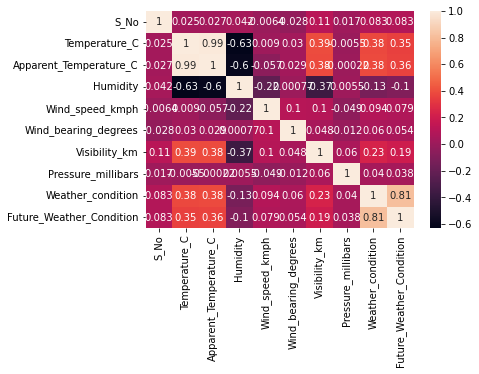

In [42]:
sns.heatmap(df.corr(method="pearson"), annot=True)

In [43]:
df.drop(['S_No','Apparent_Temperature_C'], axis=1, inplace=True)

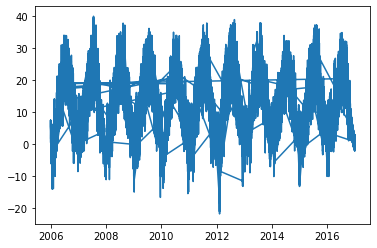

In [44]:
time = df['Timestamp']
temp = df['Temperature_C']

plt.plot(time, temp)

plt.show()

In [45]:
df.head()

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition,Future_Weather_Condition
0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,0.89,14.1197,251,15.8263,1015.13,1,1.0
1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,0.86,14.2646,259,15.8263,1015.63,1,1.0
2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,0.89,3.9284,204,14.9569,1015.94,1,1.0
3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,0.83,14.1036,269,15.8263,1016.41,1,1.0
4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,1,1.0


In [46]:
df.to_csv("dataset/weather_dataset_processed.csv")

In [47]:
# data registering and versioning

subscription_id = '7a12af0d-a67c-4fb2-85ce-acb1b512790a'
resource_group = 'MLOps'
workspace_name = 'MLOps_WS'

In [48]:
workspace = Workspace(subscription_id, resource_group, workspace_name)

Performing interactive authentication. Please follow the instructions on the terminal.


The default web browser has been opened at https://login.microsoftonline.com/organizations/oauth2/v2.0/authorize. Please continue the login in the web browser. If no web browser is available or if the web browser fails to open, use device code flow with `az login --use-device-code`.


Interactive authentication successfully completed.


In [49]:
datastore = workspace.get_default_datastore()

In [50]:
datastore.upload(src_dir='dataset', target_path='data')

"Datastore.upload" is deprecated after version 1.0.69. Please use "Dataset.File.upload_directory" to upload your files             from a local directory and create FileDataset in single method call. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 2 files
Uploading dataset\weather_dataset_processed.csv
Uploaded dataset\weather_dataset_processed.csv, 1 files out of an estimated total of 2
Uploading dataset\weather_dataset_raw.csv
Uploaded dataset\weather_dataset_raw.csv, 2 files out of an estimated total of 2
Uploaded 2 files


$AZUREML_DATAREFERENCE_bd1bacf7f76042db8df32d283ed1d55f

In [51]:
dataset = Dataset.Tabular.from_delimited_files(datastore.path('data/weather_dataset_processed.csv'))

In [52]:
dataset.take(3).to_pandas_dataframe()

,Column1,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition,Future_Weather_Condition
0,0,2006-03-31 22:00:00,"Port of Turku, Finland",9.472222,0.89,14.1197,251,15.8263,1015.13,1,1.0
1,1,2006-03-31 23:00:00,"Port of Turku, Finland",9.355556,0.86,14.2646,259,15.8263,1015.63,1,1.0
2,2,2006-04-01 00:00:00,"Port of Turku, Finland",9.377778,0.89,3.9284,204,14.9569,1015.94,1,1.0


In [53]:
weather_ds = dataset.register(workspace=workspace, name='weather_ds_processed', description='weather data is processed')